In [1]:
import os
import zipfile
local_zip = './Chessman-image-dataset/Chess'
os.listdir(local_zip)

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [2]:
# jumlah bidak
for item in os.listdir(local_zip) :
    print('total '+item+' images : '+str(len(os.listdir(local_zip+'/'+item))))

total Bishop images : 87
total King images : 76
total Knight images : 106
total Pawn images : 107
total Queen images : 78
total Rook images : 102


In [3]:
# library untuk menampilkan gambar
from keras.preprocessing import image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


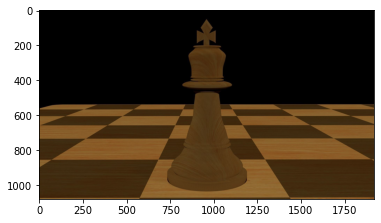

In [4]:
%matplotlib inline
img = image.load_img(local_zip+'/King/00000145.png')
imgplot = plt.imshow(img)

In [5]:
# membuat objek untuk generate data training
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join(local_zip)
train_datagen = ImageDataGenerator(rescale=1/255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.1)

In [6]:
#split data training dan validasi
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [8]:
import tensorflow as tf 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(63, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(6, activation='softmax')
])

In [9]:
# menentukan optimizer dan loss function
model.compile(optimizer=tf.optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['accuracy'])

In [15]:
history = model.fit(train_generator,
validation_data=validation_generator,
epochs=50,
verbose=2)

Epoch 1/50
63/63 - 41s - loss: 1.8534 - accuracy: 0.2044 - val_loss: 1.7819 - val_accuracy: 0.2308
Epoch 2/50
63/63 - 31s - loss: 1.7971 - accuracy: 0.2064 - val_loss: 1.7886 - val_accuracy: 0.1923
Epoch 3/50
63/63 - 32s - loss: 1.7861 - accuracy: 0.1583 - val_loss: 1.7861 - val_accuracy: 0.2115
Epoch 4/50
63/63 - 34s - loss: 1.7878 - accuracy: 0.1904 - val_loss: 1.7734 - val_accuracy: 0.2115
Epoch 5/50
63/63 - 32s - loss: 1.7690 - accuracy: 0.2184 - val_loss: 1.7689 - val_accuracy: 0.2692
Epoch 6/50
63/63 - 29s - loss: 1.7311 - accuracy: 0.2224 - val_loss: 1.7554 - val_accuracy: 0.2500
Epoch 7/50
63/63 - 44s - loss: 1.6930 - accuracy: 0.2966 - val_loss: 1.7839 - val_accuracy: 0.1923
Epoch 8/50
63/63 - 30s - loss: 1.7199 - accuracy: 0.2405 - val_loss: 1.7817 - val_accuracy: 0.1923
Epoch 9/50
63/63 - 30s - loss: 1.6554 - accuracy: 0.3126 - val_loss: 1.7483 - val_accuracy: 0.2885
Epoch 10/50
63/63 - 33s - loss: 1.6557 - accuracy: 0.2946 - val_loss: 1.7245 - val_accuracy: 0.2500
Epoch 11/

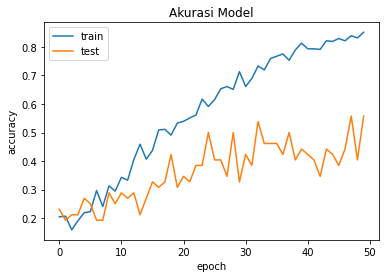

In [16]:
# akurasi
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

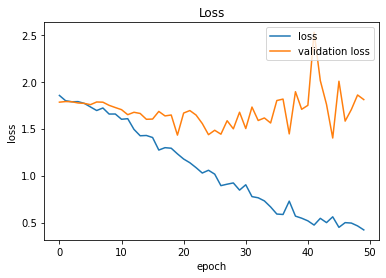

In [17]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

In [10]:
# model dengna transfer learning menggunakan resnet152v

from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import Input


In [11]:
# model dengan transfer learning dari pre trained model
# hal yang perlu diperhatikan saat menggunakan pre trained model ResNet152 ialah
# weight yaitu data yang digunakan untuk melatih model, pada kasus ini data yang digunakan pada model pretrained merupakan databse imagenet
# artinya model ResNet yang digunakan dilatih menggunakan data data pada databse raksasa imagenet.
# yang kedua yaitu include top, arah dari input hingga ke output model neural network yaitu dari bawah ke atas.
# layer yang paling atas merupakan layer output, sehingga jika kita ingin menggunakan model pretrained, kita perlu mengexclude layer output, karena bisa saja 
# output pada model pretrained tidak sesuai dengan data kita.
# yang ketiga yaitu input_tensor, parameter ini mespesifikasikan dimensi dari input, gambar yang kita proses yaitu gambar berdimensi 150x150 pixel dan RGB (3 warna)
model2 = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model2.layers[0].trainable=False

In [12]:
model2.compile(optimizer=tf.optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['accuracy'])

In [13]:
history2 = model2.fit(train_generator,
validation_data=validation_generator,
epochs=10)

Epoch 1/10
63/63 [==============================] - 92s 1s/step - loss: 12.9227 - accuracy: 0.4026 - val_loss: 2.7191 - val_accuracy: 0.5192
Epoch 2/10
63/63 [==============================] - 76s 1s/step - loss: 1.7419 - accuracy: 0.6917 - val_loss: 1.8260 - val_accuracy: 0.6923
Epoch 3/10
63/63 [==============================] - 77s 1s/step - loss: 1.3901 - accuracy: 0.7526 - val_loss: 1.0506 - val_accuracy: 0.7692
Epoch 4/10
63/63 [==============================] - 77s 1s/step - loss: 1.0428 - accuracy: 0.7818 - val_loss: 1.0481 - val_accuracy: 0.7308
Epoch 5/10
63/63 [==============================] - 78s 1s/step - loss: 0.7192 - accuracy: 0.8479 - val_loss: 0.7527 - val_accuracy: 0.7885
Epoch 6/10
63/63 [==============================] - 80s 1s/step - loss: 0.5292 - accuracy: 0.8869 - val_loss: 1.0327 - val_accuracy: 0.7692
Epoch 7/10
63/63 [==============================] - 79s 1s/step - loss: 0.5925 - accuracy: 0.8527 - val_loss: 1.5278 - val_accuracy: 0.6923
Epoch 8/10
63/63 [=